In [2]:
from math import sqrt
from random import uniform
from time import time

## Serial Implementation (No parallelization)

In [3]:
import numpy as np

In [4]:
def serial_pi_simulation(no_of_runs, number_of_darts):
    result = {}
    result['Pi_App'] = []
    result['execution_time'] = []
    result['Darts_Thrown_per_second'] = []
    for i in range(no_of_runs):
        number_of_darts_in_circle = 0.0
        start_time = time()
    
        for n in range(number_of_darts):
            x, y = uniform(0, 1), uniform(0, 1)
            if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
                number_of_darts_in_circle += 1
            
        end_time = time()
        execution_time = end_time - start_time
    
        pi_approx = 4 * number_of_darts_in_circle / float(number_of_darts)
    
        print("Pi Approximation: ", pi_approx)
        print("Number of Darts: ", number_of_darts)
        print("Execution Time (s): ", execution_time)
        print("Darts Thrown per second: ", number_of_darts_in_circle/execution_time)
        result['Pi_App'].append(pi_approx)
        result['execution_time'].append(execution_time)
        result['Darts_Thrown_per_second'].append( number_of_darts_in_circle/execution_time)
        print("result")
    
    print("Average and standard deviations across estimators: %f, %f" % (np.mean(result['Pi_App']), np.std(result['Pi_App'])))
    print("Average Execution Time was: %f" % np.mean(result['execution_time']))
    return(np.mean(result['execution_time']), np.mean(result['Darts_Thrown_per_second']))

###### Result 

In [5]:
serial_pi_simulation(200, 20000)

Pi Approximation:  3.1436
Number of Darts:  20000
Execution Time (s):  0.023589134216308594
Darts Thrown per second:  666323.7343036183
result
Pi Approximation:  3.1454
Number of Darts:  20000
Execution Time (s):  0.028236865997314453
Darts Thrown per second:  556966.9099076279
result
Pi Approximation:  3.1508
Number of Darts:  20000
Execution Time (s):  0.029551029205322266
Darts Thrown per second:  533111.719748923
result
Pi Approximation:  3.1148
Number of Darts:  20000
Execution Time (s):  0.0209958553314209
Darts Thrown per second:  741765.4462827748
result
Pi Approximation:  3.1196
Number of Darts:  20000
Execution Time (s):  0.023272991180419922
Darts Thrown per second:  670218.9623619562
result
Pi Approximation:  3.1342
Number of Darts:  20000
Execution Time (s):  0.021154165267944336
Darts Thrown per second:  740799.7338352475
result
Pi Approximation:  3.128
Number of Darts:  20000
Execution Time (s):  0.0231320858001709
Darts Thrown per second:  676117.1532523216
result
Pi Ap

(0.02256542682647705, 702963.87623260275)

By conducting a simulation with 200 runs and 20000 darts thrown in each run, we are able to simulate/approximate pi accuractely: mean is around 3.142145 with a standard deviation of 0.011813 and the average execution time was 0.025 seconds

## Multiprocessing
In order to do multiprocessing, we must define the function for parallelism accordingly

In [6]:
def throw_dart(i = 1):
    x, y = uniform(0,1), uniform(0,1)
    dart_in_circle = 0
    if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
        dart_in_circle = 1
    return(dart_in_circle)

In [7]:
# Test run
throw_dart()

1

In [8]:
from multiprocessing import Pool

In [9]:
def multiprocess(number_of_darts):
    pool = Pool(processes=4)
    start_time = time()
    g = pool.map(throw_dart, range(number_of_darts))
    end_time = time()
    execution_time = end_time - start_time
    pi_approx = 4 * sum(g)/number_of_darts
    del pool
    
    print("Pi Approximation: ", pi_approx)
    print("Number of Darts: ", number_of_darts)
    print("Execution Time (s): ", execution_time)
    print("Darts Thrown per second: ", int(number_of_darts/execution_time))
    return(execution_time, int(number_of_darts/execution_time))

In [10]:
multiprocess(2000000)

Pi Approximation:  3.14255
Number of Darts:  2000000
Execution Time (s):  1.4505548477172852
Darts Thrown per second:  1378782


(1.4505548477172852, 1378782)

## Dask

In [11]:
import dask.array as da

In [12]:
def dask_simulation(number_of_darts):
    start_time = time()
    x = da.random.uniform(0, 1, size = number_of_darts, chunks = 100)
    y = da.random.uniform(0, 1, size = number_of_darts, chunks = 100)
    
    dart_in_circle = (x - 0.5)**2 + (y - 0.5)**2 < 0.5**2
    end_time = time()
    execution_time = end_time - start_time
    pi_approx = 4 * sum(dart_in_circle.compute())/number_of_darts
    
    print("Pi Approximation: ", pi_approx)
    print("Number of Darts: ", number_of_darts)
    print("Execution Time (s): ", execution_time)
    print("Darts Thrown per second: ", number_of_darts/execution_time)
    return(execution_time, int(number_of_darts/execution_time))
    

In [13]:
dask_simulation(2000000)

Pi Approximation:  3.143312
Number of Darts:  2000000
Execution Time (s):  2.0565290451049805
Darts Thrown per second:  972512.4013008556


(2.0565290451049805, 972512)

In [51]:
np.logspace(1, 7, 9)

array([  1.00000000e+01,   5.62341325e+01,   3.16227766e+02,
         1.77827941e+03,   1.00000000e+04,   5.62341325e+04,
         3.16227766e+05,   1.77827941e+06,   1.00000000e+07])

## Plotting results

In [14]:
number_of_darts = np.logspace(1, 7, 9)
number_of_darts = number_of_darts.astype(int)
serial = []
mp = []
dk = []
for i in number_of_darts:
    serial.append(serial_pi_simulation(1, i))
    mp.append(multiprocess(i))
    dk.append(dask_simulation(i))

Pi Approximation:  3.2
Number of Darts:  10
Execution Time (s):  2.002716064453125e-05
Darts Thrown per second:  399457.5238095238
result
Average and standard deviations across estimators: 3.200000, 0.000000
Average Execution Time was: 0.000020
Pi Approximation:  2.0
Number of Darts:  10
Execution Time (s):  0.0031280517578125
Darts Thrown per second:  3196
Pi Approximation:  2.8
Number of Darts:  10
Execution Time (s):  0.015759944915771484
Darts Thrown per second:  634.519984267
Pi Approximation:  3.2857142857142856
Number of Darts:  56
Execution Time (s):  8.797645568847656e-05
Darts Thrown per second:  522867.1653116531
result
Average and standard deviations across estimators: 3.285714, 0.000000
Average Execution Time was: 0.000088
Pi Approximation:  3.07142857143
Number of Darts:  56
Execution Time (s):  0.0057830810546875
Darts Thrown per second:  9683
Pi Approximation:  2.92857142857
Number of Darts:  56
Execution Time (s):  0.01915121078491211
Darts Thrown per second:  2924.097

In [15]:
dk

[(0.015759944915771484, 634),
 (0.01915121078491211, 2924),
 (0.019921064376831055, 15862),
 (0.025465011596679688, 69821),
 (0.05329108238220215, 187648),
 (0.09984612464904785, 563206),
 (0.34105801582336426, 927194),
 (1.7377779483795166, 1023306),
 (11.684601068496704, 855827)]

In [16]:
serial_time = [x[0] for x in serial]
serial_rate = [x[1] for x in serial]
mp_time = [x[0] for x in mp]
mp_rate = [x[1] for x in mp]
dk_time = [x[0] for x in dk]
dk_rate = [x[1] for x in dk]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

[3.4093856811523438e-05, 0.00010085105895996094, 0.00059294700622558594, 0.0033171176910400391, 0.015367031097412109, 0.063620090484619141, 0.3909912109375, 2.0000247955322266, 11.424696207046509] <class 'numpy.ndarray'>


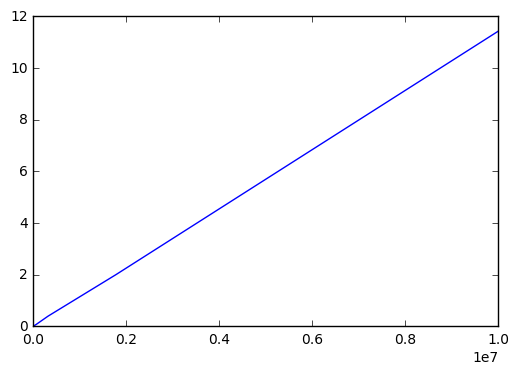

In [22]:
print(serial_time, type(number_of_darts))
type(serial_time)
plt.plot(number_of_darts, serial_time)

In [25]:
number_of_darts

array([      10,       56,      316,     1778,    10000,    56234,
         316227,  1778279, 10000000])

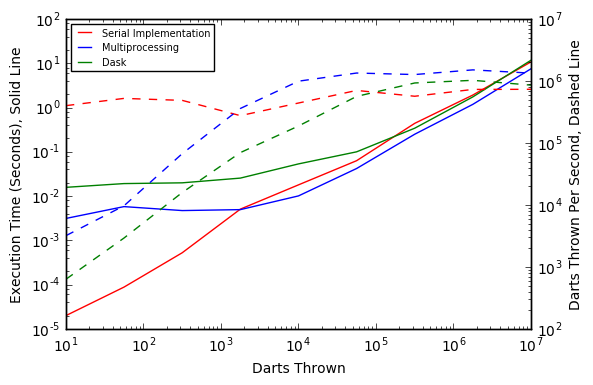

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.yscale('log')
plt.xscale('log')
ax1.set_yscale('log')
#ax2.yaxis.tick_right()
ax1.plot(number_of_darts, serial_time, 'r-', label="Serial Implementation")
ax1.plot(number_of_darts, mp_time, 'b-', label="Multiprocessing")
ax1.plot(number_of_darts, dk_time, 'g-', label="Dask")
ax2.plot(number_of_darts, serial_rate, 'r--', label="Serial Implementation")
ax2.plot(number_of_darts, mp_rate, 'b--', label="Multiprocessing")
ax2.plot(number_of_darts, dk_rate, 'g--', label="Dask")
ax1.minorticks_on()
ax1.set_ylim(10**(-5), 10**2)
ax2.minorticks_on()
ax2.set_ylim(10**2, 10**7)
ax1.set_ylabel('Execution Time (Seconds), Solid Line')
ax1.set_xlabel('Darts Thrown')
ax2.set_ylabel('Darts Thrown Per Second, Dashed Line')
ax1.legend(prop={'size': 7}, loc = 'best')

#### System Specifications:
Macbook Pro (El Capitan 10.11.6)
Processor: 3.1 GHz Intel Core i7
Memory: 16 GB 1867 MHz DDR3